**Inspection HighlightSum dataset**

In [ ]:
from datasets import load_dataset

# Load dataset
dataset = load_dataset("knkarthick/highlightsum")

# Inspect variables 
dataset["train"][0].keys()

# View the first sample from the train split
sample = dataset["train"][0]

print("📘 First dataset entry:")
for key, value in sample.items():
    print(f"\n=== {key.upper()} ===\n{value}")


README.md: 0.00B [00:00, ?B/s]

train.csv:   0%|          | 0.00/27.0M [00:00<?, ?B/s]

validation.csv: 0.00B [00:00, ?B/s]

test.csv: 0.00B [00:00, ?B/s]

Generating train split:   0%|          | 0/27401 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1360 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2347 [00:00<?, ? examples/s]

📘 First dataset entry:

=== ID ===
30

=== DIALOGUE ===
Speaker A: Cool. Do you wanna give me the little cable thing? Yeah. Cool. Ah, that's why it won't meet. Okay, cool. Yep, cool. Okay, functional requirements. Alright, yeah. It's working. Cool, okay. So what I have, wh where I've got my information from is a survey where the usability lab um observed remote control use with um a hundred subjects and then they gave them a questionnaire. Um so it was all about, you know, how people feel about the look and feel of the remote control, you know. What's the most annoying things about remote controls and um the possibility of speech recognition and L_C_D_ screens in remote control. Not that they actually gave me any answers on the L_C_D_ screens, so I should have taken that bit out, but anyway. Um okay, so. What they found is that people don't like how current remote controls are, so you know, definitely you should be looking at something quite different. Um seventy five percent of users 

In [ ]:
#dataset["train"][0].keys()


dict_keys(['id', 'dialogue', 'summary'])

**Large Model Safe Benchmarking with Preprocessing**

Since the plan is to fine-tune on 2,000 (2k) samples, the benchmarking subset should be large enough to get meaningful ROUGE estimates, but small enough to safely run large models on your GPU. Therefore, since the fine-tuning set is 2k, using 100–200 samples for benchmarking is enough to approximate performance before fine-tuning. This subset has several advantages such as:   
- Provides more stable ROUGE scores than tiny subsets.
- Full evaluation / final metrics:
- Use all available test samples (e.g., HighlightSUM test split).
- Ensures the scores are representative of the dataset.  

For the purpose of this study, ``N_SAMPLES for benchmarking has been set up to 200 samples``.  

Here’s the Notebook C that is  fully aligned with standard evaluation pipelines and that:  
  - Benchmarks large models safely on Colab.
  - Performs basic preprocessing (tokenization, padding, truncation, batching).  
  - Handles tokenizer safety (pad_token set if missing).  
  - Includes train/validation/test split handling.  
  - Clearly highlights all places where tokenizer safety or padding/truncation is applied.  

_Basic preprocessing_ has been performed, including tokenization of dialogues with appropriate padding and truncation, batch preparation for seq2seq models, and selection of a subset from the HighlightSUM train split for benchmarking. In details, the performed basic preprocessing is charachterised by:  
> _Tokenization_:
  - All text inputs (dialogue) are tokenized using the model-specific tokenizer.  
  - For causal models, if pad_token was missing, it was set to eos_token to allow batching/padding.  
  - Seq2seq and causal models both use truncation and padding (max_length=1024) to ensure consistent tensor shapes.  
> Dataset splitting:  
  - Selected a subset of samples (N_SAMPLES) from the HighlightSUM train split for benchmarking.
  - If desired, you could extend this to full train/validation/test splits for proper evaluation.
> Batching (seq2seq models):  
  - Inputs are batched to reduce memory usage on GPU, which is part of preprocessing before model inference.

env: CUDA_LAUNCH_BLOCKING=1
🔥 Using device: cuda
Train samples: 27401
Validation samples: 1360
Test samples: 200
Columns: ['id', 'dialogue', 'summary']

🔥 Running Model Benchmarks...

🚀 Benchmarking BART-large...

🚀 Benchmarking T5-large...

🚀 Benchmarking Phi-3-Mini...


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]


🚀 Benchmarking LLaMA-1B...


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for


🚀 Benchmarking LLaMA-3B...


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for

,rouge1,rouge2,rougeL,time,throughput,efficiency,composite_score
BART-large,28.107296,9.229025,21.038022,214.299854,0.933272,0.098171,1.000000
LLaMA-1B,22.225994,9.552435,16.049638,479.141066,0.417414,0.033497,0.451424
Phi-3-Mini,24.155261,10.463062,17.668568,1280.113872,0.156236,0.013802,0.427350
LLaMA-3B,22.273046,9.871545,16.004961,968.169577,0.206575,0.016531,0.358622
T5-large,10.756401,1.884288,9.492152,731.983771,0.273230,0.012968,0.022585


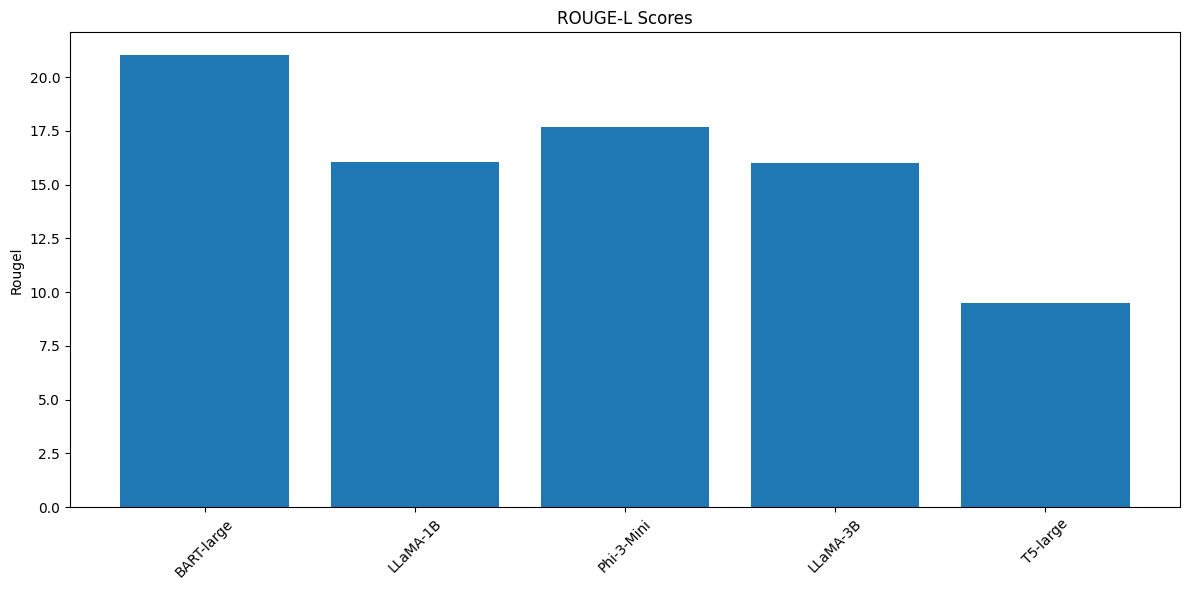

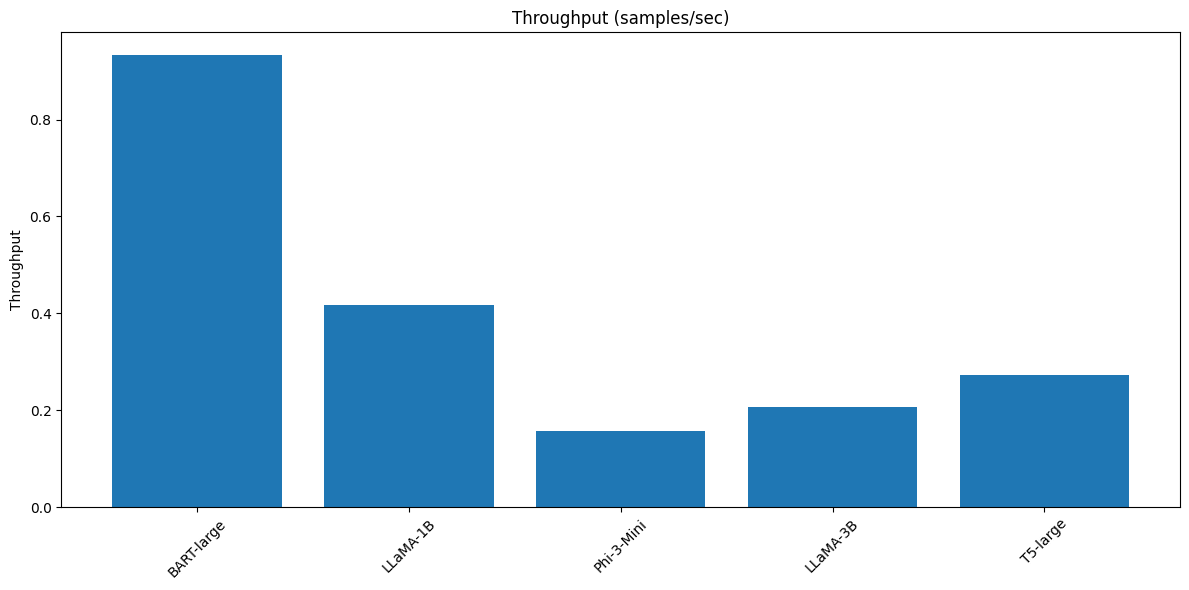

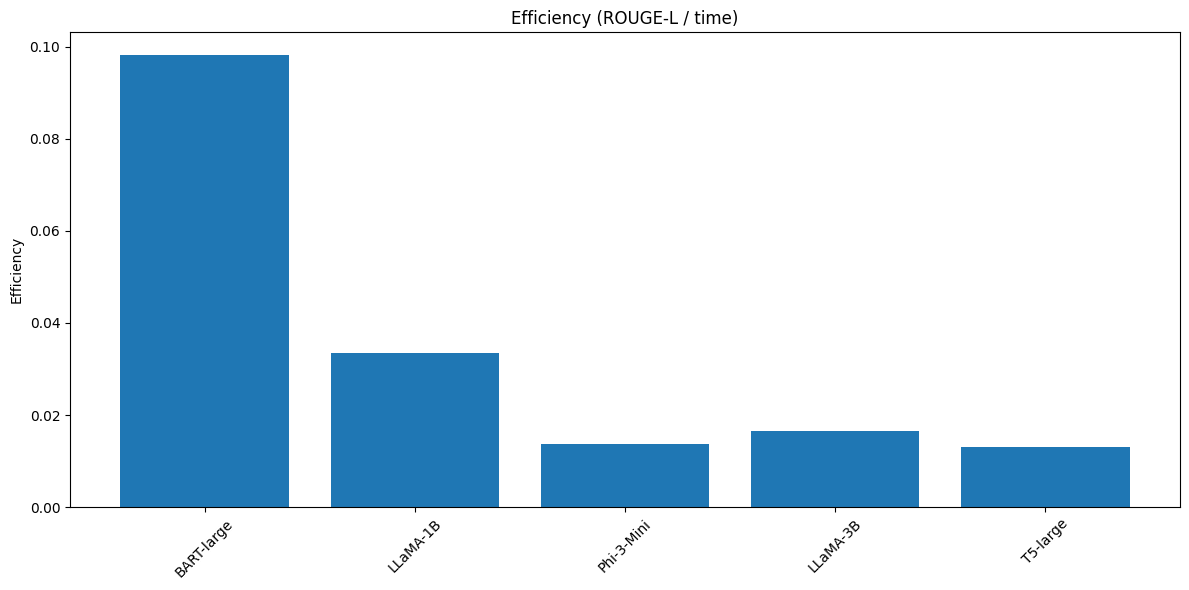

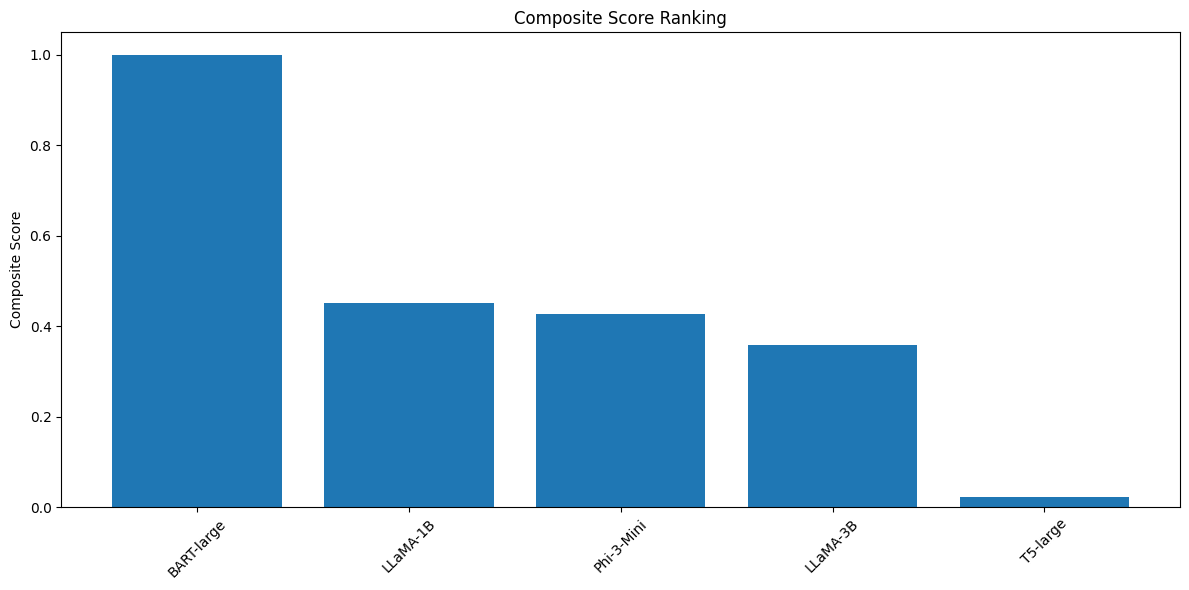


🎉 Notebook C Large Model Safe Benchmarking completed successfully.


In [4]:
# =====================================================
# 📘 Notebook C — Large Model Safe Benchmarking with Preprocessing
# =====================================================

# -------------------------
# Install dependencies
# -------------------------
!pip install datasets transformers accelerate sentencepiece rouge-score pandas tqdm matplotlib seaborn

# -------------------------
# Imports
# -------------------------
import os
import time
import json
import torch
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from datasets import load_dataset
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, AutoModelForCausalLM
from rouge_score import rouge_scorer

# -------------------------
# Debugging CUDA errors
# -------------------------
%env CUDA_LAUNCH_BLOCKING=1

# =====================================================
# GLOBAL SETTINGS
# =====================================================
device = "cuda" if torch.cuda.is_available() else "cpu"
print("🔥 Using device:", device)

N_SAMPLES = 200  # number of test samples for debugging
BATCH_SIZE = 2  # batch size for seq2seq models

# =====================================================
# LOAD AND PREPARE DATASET
# =====================================================
dataset = load_dataset("knkarthick/highlightsum")

# Basic preprocessing: selecting splits
train_data = dataset["train"]
val_data = dataset["validation"]
test_data = dataset["test"].select(range(N_SAMPLES))  # small subset for benchmarking

print("Train samples:", len(train_data))
print("Validation samples:", len(val_data))
print("Test samples:", len(test_data))
print("Columns:", test_data.column_names)

# =====================================================
# ROUGE UTILS
# =====================================================
scorer = rouge_scorer.RougeScorer(["rouge1", "rouge2", "rougeL"], use_stemmer=True)

def compute_rouge(preds, refs):
    agg = {"rouge1": 0, "rouge2": 0, "rougeL": 0}
    for pred, ref in zip(preds, refs):
        scores = scorer.score(ref, pred)
        for k in agg:
            agg[k] += scores[k].fmeasure
    n = len(preds)
    return {k: v / n * 100 for k, v in agg.items()}

# =====================================================
# SUMMARIZATION FUNCTIONS
# =====================================================
def summarize_seq2seq_batch(model, tokenizer, texts):
    """
    Batch inference for seq2seq models.
    Basic preprocessing applied here:
        - tokenization
        - padding/truncation
        - max_length=1024
    """
    inputs = tokenizer(
        texts,
        truncation=True,        # truncate sequences exceeding max_length
        padding="longest",      # pad to the longest sequence in batch
        max_length=1024,        # max tokens for input
        return_tensors="pt"
    ).to(device)
    start = time.time()
    output = model.generate(**inputs, max_new_tokens=120)
    latency = time.time() - start
    preds = [tokenizer.decode(o, skip_special_tokens=True) for o in output]
    return preds, latency

def summarize_chat(model, tokenizer, text):
    """
    Summarization for causal models (LLaMA, Phi-3-Mini).
    Basic preprocessing applied here:
        - tokenization
        - padding/truncation
        - max_length=1024
    """
    messages = [
        {"role": "system", "content": "Summarize this text concisely."},
        {"role": "user", "content": text},
    ]
    if hasattr(tokenizer, "apply_chat_template"):
        prompt = tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)
    else:
        prompt = text

    inputs = tokenizer(
        prompt,
        truncation=True,
        padding="max_length",
        max_length=1024,
        return_tensors="pt"
    ).to(device)
    start = time.time()
    output = model.generate(**inputs, max_new_tokens=120)
    latency = time.time() - start
    return tokenizer.decode(output[0], skip_special_tokens=True).strip(), latency

# =====================================================
# BENCHMARK FUNCTION (Large Model Safe)
# =====================================================
def benchmark_models_safe(models_dict):
    results = {}
    for name, model_id in models_dict.items():
        print(f"\n🚀 Benchmarking {name}...")
        try:
            tokenizer = AutoTokenizer.from_pretrained(model_id)

            # -------------------------
            # Tokenizer safety check
            # -------------------------
            if tokenizer.pad_token is None:
                tokenizer.pad_token = tokenizer.eos_token  # ensures safe padding for batching

            # Detect model type
            if any(k in model_id.lower() for k in ["bart","t5"]):
                # Seq2Seq model with gradient checkpointing and fp16
                model = AutoModelForSeq2SeqLM.from_pretrained(
                    model_id,
                    device_map="auto",
                    torch_dtype=torch.float16
                )
                summarize_fn = summarize_seq2seq_batch
            else:
                # Causal LM safe loading
                model = AutoModelForCausalLM.from_pretrained(
                    model_id,
                    device_map="auto",
                    torch_dtype=torch.float16
                )
                summarize_fn = summarize_chat

            # -------------------------
            # Inference and benchmarking
            # -------------------------
            preds = []
            refs = test_data["summary"]
            total_time = 0.0

            if summarize_fn == summarize_seq2seq_batch:
                # Batch inference for seq2seq
                for i in range(0, N_SAMPLES, BATCH_SIZE):
                    batch_texts = test_data["dialogue"][i:i+BATCH_SIZE]
                    batch_preds, latency = summarize_fn(model, tokenizer, batch_texts)
                    preds.extend(batch_preds)
                    total_time += latency
            else:
                # Single inference for causal models
                for dialog, ref in zip(test_data["dialogue"], refs):
                    pred, latency = summarize_fn(model, tokenizer, dialog)
                    preds.append(pred)
                    total_time += latency

            scores = compute_rouge(preds, refs)
            throughput = N_SAMPLES / total_time
            efficiency = scores["rougeL"] / total_time

            results[name] = {
                **scores,
                "time": total_time,
                "throughput": throughput,
                "efficiency": efficiency,
            }

        except Exception as e:
            print(f"❌ Error with {name}: {e}")
            results[name] = {
                "rouge1": 0, "rouge2": 0, "rougeL": 0,
                "time": 9999, "throughput": 0, "efficiency": 0
            }

        # Free GPU memory after each model
        torch.cuda.empty_cache()

    return results

# =====================================================
# MODELS TO BENCHMARK (Large models, Colab safe)
# =====================================================
MODELS_A = {
    "BART-large": "facebook/bart-large-cnn",
    "T5-large": "t5-large",
}

MODELS_B = {
    "Phi-3-Mini": "microsoft/Phi-3-mini-4k-instruct",
    "LLaMA-1B": "meta-llama/Llama-3.2-1B-Instruct",
    "LLaMA-3B": "meta-llama/Llama-3.2-3B-Instruct",
}

# =====================================================
# RUN BENCHMARK
# =====================================================
print("\n🔥 Running Model Benchmarks...")
results_A = benchmark_models_safe(MODELS_A)
results_B = benchmark_models_safe(MODELS_B)
results_all = {**results_A, **results_B}

df = pd.DataFrame(results_all).T.astype(float)

# =====================================================
# BUILD SCOREBOARD
# =====================================================
df_norm = df.copy()
for col in ["rougeL", "throughput", "efficiency"]:
    if df[col].max() != df[col].min():
        df_norm[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())
    else:
        df_norm[col] = 1.0

df["composite_score"] = (
    0.60 * df_norm["rougeL"]
    + 0.25 * df_norm["efficiency"]
    + 0.15 * df_norm["throughput"]
)

df_sorted = df.sort_values("composite_score", ascending=False)
display(df_sorted)

# =====================================================
# SAVE RESULTS
# =====================================================
SAVE_DIR = "outputs/benchmarks/notebook_C"
os.makedirs(SAVE_DIR, exist_ok=True)
df_sorted.to_csv(f"{SAVE_DIR}/final_ranking.csv")
df_sorted.to_html(f"{SAVE_DIR}/final_ranking.html")
with open(f"{SAVE_DIR}/final_ranking.json", "w") as f:
    json.dump(df_sorted.to_dict(), f, indent=2)

# =====================================================
# VISUALIZATIONS
# =====================================================
metrics = ["rougeL", "throughput", "efficiency", "composite_score"]
titles = ["ROUGE-L Scores", "Throughput (samples/sec)", "Efficiency (ROUGE-L / time)", "Composite Score Ranking"]
filenames = ["chart_rougeL.png", "chart_throughput.png", "chart_efficiency.png", "chart_composite.png"]

for metric, title, fname in zip(metrics, titles, filenames):
    plt.figure(figsize=(12,6))
    plt.bar(df_sorted.index, df_sorted[metric])
    plt.title(title)
    plt.ylabel(metric.replace("_"," ").title())
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f"{SAVE_DIR}/{fname}")
    plt.show()
    plt.close()

print("\n🎉 Notebook C Large Model Safe Benchmarking completed successfully.")
